In [ ]:
# Rohit Ranjan
# 20CS30066
# Assignment 5

In [1]:
#import commands
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (80,80)
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

#xgboost
import xgboost as xgb

#SVM 
from sklearn.svm import SVR

In [2]:
#datafile provided
filename = "S_n_I_A_N_P_An_Io_noaa2.txt"

In [3]:
#preprocessing the datafile
rows=[]
for line in open(filename):
    curr_row = list(map(float, line.split()))
    rows.append(curr_row)

In [4]:
len(rows)

870

In [5]:
df = pd.DataFrame(rows)
df.columns = ['SAM','nino','ISMR','AMO','NAO','PDO','At-nino','IOD']

In [6]:
cols_ordered = ['SAM','nino','AMO','NAO','PDO','At-nino','IOD','ISMR']
df = df[cols_ordered]

In [7]:
df.head(5)

,SAM,nino,AMO,NAO,PDO,At-nino,IOD,ISMR
0,0.599257,0.167651,0.484010,0.000837,1.084100,0.560382,-0.295856,10.24380
1,0.663879,0.212788,0.603261,-0.317969,-1.465790,1.189540,-0.032952,44.16110
2,-0.428772,0.336627,0.609364,0.423296,0.114019,0.783738,-0.644708,4.76807
3,0.513283,0.575112,0.219494,0.352545,1.807430,0.560395,-0.295477,-63.58770
4,-0.260801,0.647786,0.040233,-0.528239,-0.108867,0.727379,0.044719,12.57720


In [8]:
#Experiments with xgBoost

In [9]:
true_values = []
pred_values = []
rmse_values = []

for lag in range(1,11):
    # forming features using lag
    y = df['ISMR'][lag:]
    X = df.iloc[:-1*lag,:]
    
    # converting to efficient data structure
    data_dmatrix = xgb.DMatrix(data=X,label=y)
    
    # intialising xgboost regressor object and fitting on data
    xg_reg = xgb.XGBRegressor(colsample_bytree = 0.3, learning_rate = 0.1,max_depth = 5, alpha = 10, n_estimators = 1000)
    xg_reg.fit(X,y)
    
    #generating predictions
    preds = xg_reg.predict(X)
    
    # calculating error to help as compare lag performance
    rmse = np.sqrt(mean_squared_error(y, preds))
    
    # appending values to a list for later use
    true_values.append(y)
    pred_values.append(preds)
    rmse_values.append((rmse))

In [10]:
rmse_table = pd.DataFrame(list(np.array(rmse_values).reshape((len(rmse_values),-1)).T))
rmse_table.columns = [("Lag_"+str(i)) for i in range(1,11)]

In [11]:
rmse_table

,Lag_1,Lag_2,Lag_3,Lag_4,Lag_5,Lag_6,Lag_7,Lag_8,Lag_9,Lag_10
0,1.586117,1.700843,1.797371,1.75844,1.742344,1.723301,1.743826,1.765855,1.814621,1.634117


In [12]:
# computing table for different lags
table = pd.DataFrame()
table['True ISMR'] = df['ISMR']

In [13]:
# padding the lag columns
for i in range(len(pred_values)):
    pred_lag = list(pred_values[i])
    for i in range(df.shape[0]-len(pred_lag)):
        pred_lag.insert(0,np.NaN)
    table['Lag_'+str(i+1)] = pred_lag

In [14]:
table[0:20]

,True ISMR,Lag_1,Lag_2,Lag_3,Lag_4,Lag_5,Lag_6,Lag_7,Lag_8,Lag_9,Lag_10
0,10.243800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,44.161100,43.150269,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4.768070,5.338588,4.439160,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,-63.587700,-62.148609,-62.418106,-58.706940,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,12.577200,12.076989,11.821412,11.542588,13.834686,NaN,NaN,NaN,NaN,NaN,NaN
5,-41.577200,-41.952026,-38.927246,-38.944092,-42.661339,-38.924084,NaN,NaN,NaN,NaN,NaN
6,-9.546880,-9.879082,-10.141637,-9.084824,-9.147939,-9.122007,-7.095208,NaN,NaN,NaN,NaN
7,25.370500,24.726170,23.547773,23.525265,24.865967,24.532143,24.191381,25.250797,NaN,NaN,NaN
8,18.277400,18.698280,17.388618,16.878601,20.062557,17.476351,16.491549,18.776773,17.648241,NaN,NaN
9,2.221670,1.521839,2.148856,3.221498,1.718592,0.318806,1.528083,3.899342,1.213346,1.961416,NaN


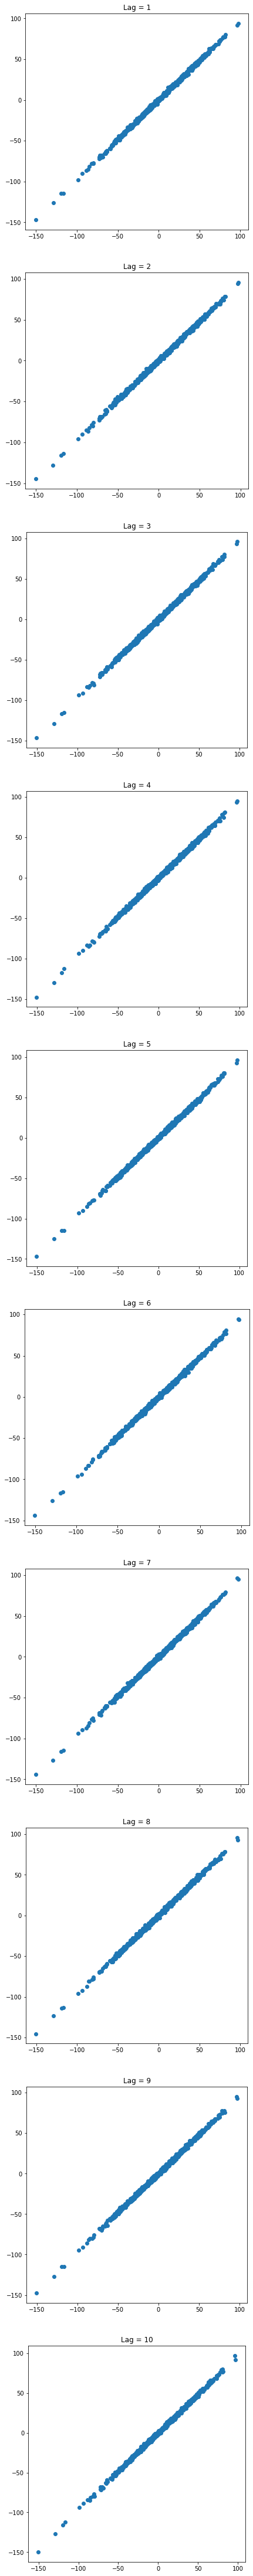

In [15]:
# plotting scatter plots
fig, axs = plt.subplots(10)
for i in range(10):
    axs[i].scatter(true_values[i],pred_values[i])
    axs[i].xlabel = 'True Values'
    axs[i].ylabel = 'Predicted Values'
    axs[i].set_title("Lag = "+str(i+1))
    axs[i].set_aspect('equal', adjustable='box')

In [16]:
# The best lag in drivers is 1 from our analysis. From the plotted graphs that xgboost trained with lag=1 dataset gives preds that most closely resemble the true values. This leads to the graoh being closest to a staright line among all 10 lags.

In [17]:
# SVM - Linear Kernel

In [18]:
true_values = []
pred_values = []
rmse_values = []
for lag in range(1,11):
    # forming features using lag
    y = df['ISMR'][lag:]
    X = df.iloc[:-1*lag,:]
    
    # intialising SVM regressor object and fitting on data
    svr = SVR(kernel ='linear', C=1.0, epsilon=0.1)
    svr.fit(X,y)
    
    #generating predictions
    preds = svr.predict(X)
    
    # calculating error to help as compare lag performance
    rmse = np.sqrt(mean_squared_error(y, preds))
    
    # appending values to a list for later use
    true_values.append(y)
    pred_values.append(preds)
    rmse_values.append((rmse))

In [19]:
rmse_table = pd.DataFrame(list(np.array(rmse_values).reshape((len(rmse_values),-1)).T))
rmse_table.columns = [("Lag_"+str(i)) for i in range(1,11)]

In [20]:
rmse_table

,Lag_1,Lag_2,Lag_3,Lag_4,Lag_5,Lag_6,Lag_7,Lag_8,Lag_9,Lag_10
0,31.550819,32.17455,32.850646,33.040213,32.987998,32.984692,32.878436,32.752821,32.840307,32.994115


In [21]:
table = pd.DataFrame()
table['True ISMR'] = df['ISMR']

In [22]:
for i in range(len(pred_values)):
    pred_lag = list(pred_values[i])
    for i in range(df.shape[0]-len(pred_lag)):
        pred_lag.insert(0,np.NaN)
    table['Lag_'+str(i+1)] = pred_lag

In [23]:
table[0:20]

,True ISMR,Lag_1,Lag_2,Lag_3,Lag_4,Lag_5,Lag_6,Lag_7,Lag_8,Lag_9,Lag_10
0,10.243800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,44.161100,0.823180,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4.768070,4.867730,1.860854,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,-63.587700,-2.126838,6.851839,1.727825,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,12.577200,-11.990512,0.269369,3.652074,5.455071,NaN,NaN,NaN,NaN,NaN,NaN
5,-41.577200,-5.372353,-8.518099,1.674918,5.052237,2.126606,NaN,NaN,NaN,NaN,NaN
6,-9.546880,-5.253140,-3.546155,-1.582393,4.772103,6.275801,3.273256,NaN,NaN,NaN,NaN
7,25.370500,6.234563,-5.974274,-1.381092,-0.262685,4.042350,2.506127,1.702393,NaN,NaN,NaN
8,18.277400,8.497448,2.104331,-3.466746,1.935317,0.441458,7.155424,3.645954,2.205893,NaN,NaN
9,2.221670,-3.681849,7.646596,-0.605787,-8.325702,1.718356,5.751010,4.408004,-0.365594,0.525703,NaN


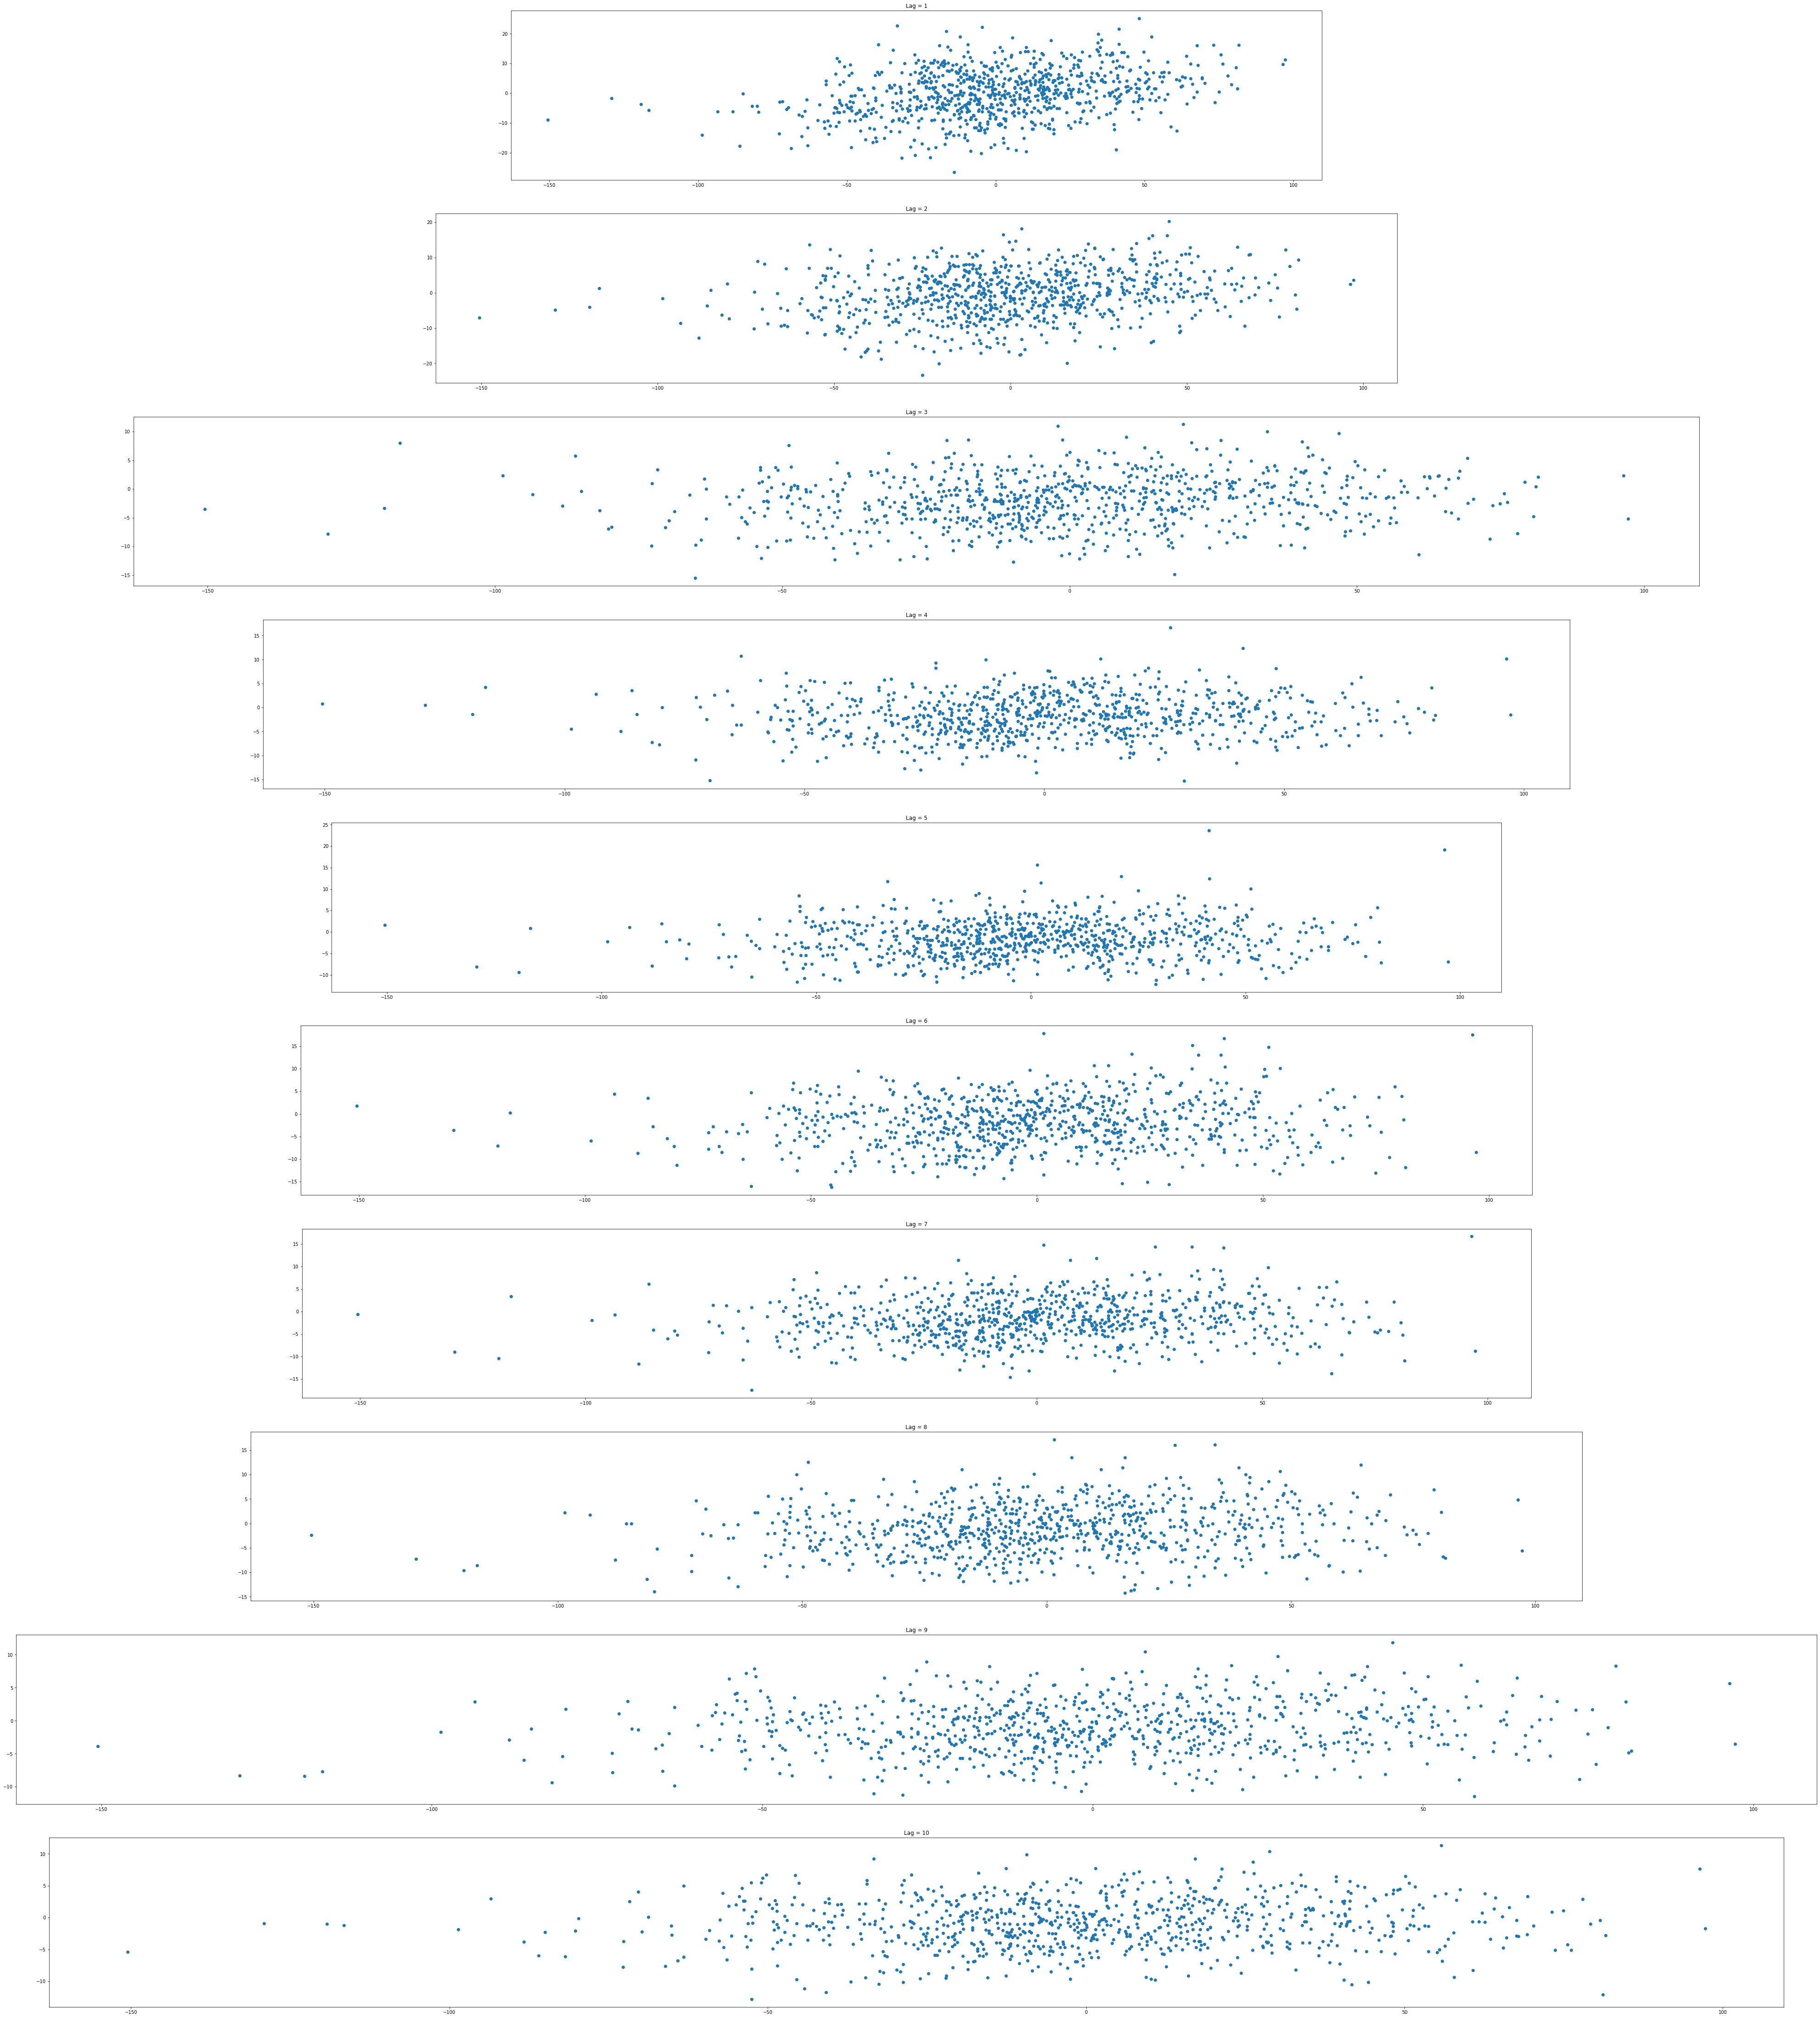

In [24]:
fig, axs = plt.subplots(10)
for i in range(10):
    axs[i].scatter(true_values[i],pred_values[i])
    axs[i].xlabel = 'True Values'
    axs[i].ylabel = 'Predicted Values'
    axs[i].set_title("Lag = "+str(i+1))
    axs[i].set_aspect('equal', adjustable='box')

In [25]:
# SVM - Poly Kernel

In [26]:
true_values = []
pred_values = []
rmse_values = []
for lag in range(1,11):
    # forming features using lag
    y = df['ISMR'][lag:]
    X = df.iloc[:-1*lag,:]
    
    # intialising SVM regressor object and fitting on data
    svr = SVR(kernel ='poly', C=1.0, epsilon=0.1)
    svr.fit(X,y)
    
    #generating predictions
    preds = svr.predict(X)
    
    # calculating error to help as compare lag performance
    rmse = np.sqrt(mean_squared_error(y, preds))
    
    # appending values to a list for later use
    true_values.append(y)
    pred_values.append(preds)
    rmse_values.append((rmse))

In [27]:
rmse_table = pd.DataFrame(list(np.array(rmse_values).reshape((len(rmse_values),-1)).T))
rmse_table.columns = [("Lag_"+str(i)) for i in range(1,11)]

In [28]:
rmse_table

,Lag_1,Lag_2,Lag_3,Lag_4,Lag_5,Lag_6,Lag_7,Lag_8,Lag_9,Lag_10
0,32.611828,32.92766,33.057109,33.041273,33.080376,32.981059,32.938083,33.0812,33.088109,33.141695


In [29]:
table = pd.DataFrame()
table['True ISMR'] = df['ISMR']

In [30]:
for i in range(len(pred_values)):
    pred_lag = list(pred_values[i])
    for i in range(df.shape[0]-len(pred_lag)):
        pred_lag.insert(0,np.NaN)
    table['Lag_'+str(i+1)] = pred_lag

In [31]:
table[0:20]

,True ISMR,Lag_1,Lag_2,Lag_3,Lag_4,Lag_5,Lag_6,Lag_7,Lag_8,Lag_9,Lag_10
0,10.243800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,44.161100,-0.553799,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4.768070,1.409998,-1.337070,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,-63.587700,-0.594516,-0.480561,-1.145828,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,12.577200,-7.831394,-1.345313,-1.116867,-1.147418,NaN,NaN,NaN,NaN,NaN,NaN
5,-41.577200,-0.567826,-4.416571,-1.159616,-0.818578,-1.357415,NaN,NaN,NaN,NaN,NaN
6,-9.546880,-3.268182,-1.360824,-1.322785,-1.161940,-1.061223,-1.489415,NaN,NaN,NaN,NaN
7,25.370500,-0.600268,-2.095118,-1.140791,-2.427974,-1.350311,-1.729758,-1.313935,NaN,NaN,NaN
8,18.277400,-0.185252,-1.334301,-1.457471,-1.146612,-1.896288,-1.498301,-2.350474,-1.534397,NaN,NaN
9,2.221670,-0.424751,-1.026527,-1.151829,-1.736113,-1.343231,1.875892,-1.273009,-2.102512,-1.378408,NaN


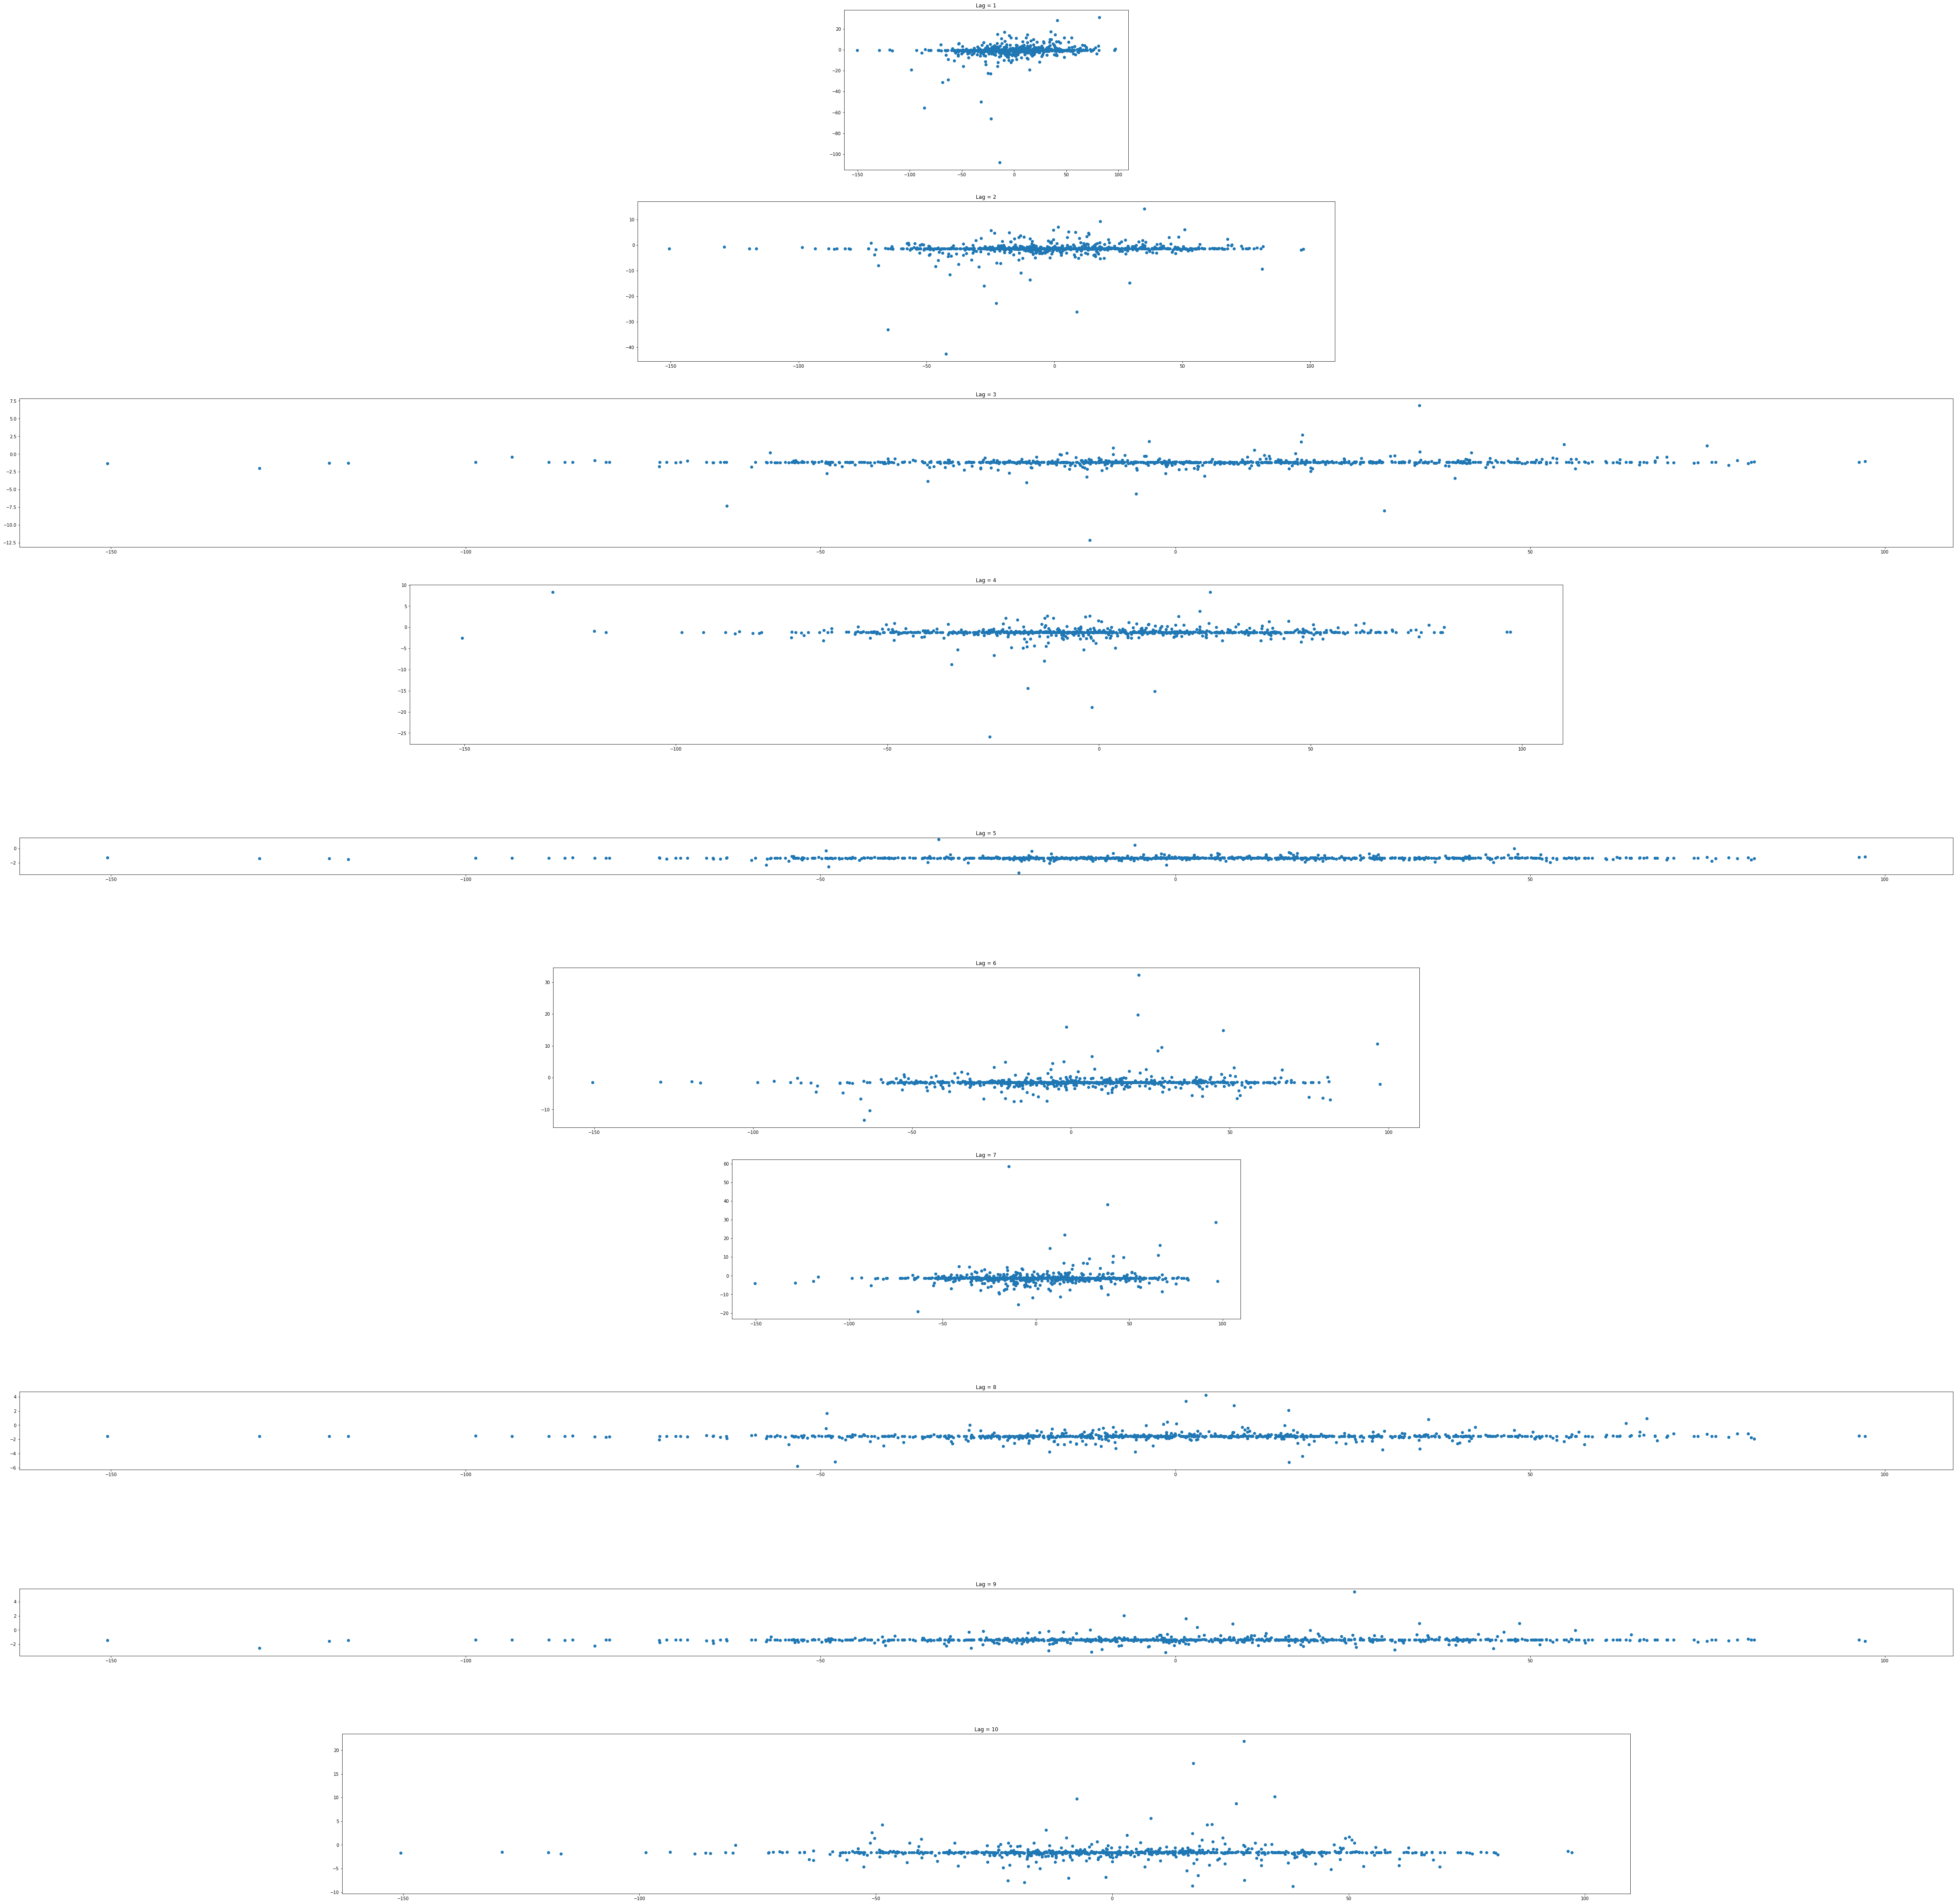

In [32]:
fig, axs = plt.subplots(10)
for i in range(10):
    axs[i].scatter(true_values[i],pred_values[i])
    axs[i].xlabel = 'True Values'
    axs[i].ylabel = 'Predicted Values'
    axs[i].set_title("Lag = "+str(i+1))
    axs[i].set_aspect('equal', adjustable='box')

In [33]:
# SVM - Sigmoid Kernel

In [34]:
true_values = []
pred_values = []
rmse_values = []
for lag in range(1,11):
    # forming features using lag
    y = df['ISMR'][lag:]
    X = df.iloc[:-1*lag,:]
    
    # intialising SVM regressor object and fitting on data
    svr = SVR(kernel ='sigmoid', C=1.0, epsilon=0.1)
    svr.fit(X,y)
    
    #generating predictions
    preds = svr.predict(X)
    
    # calculating error to help as compare lag performance
    rmse = np.sqrt(mean_squared_error(y, preds))
    
    # appending values to a list for later use
    true_values.append(y)
    pred_values.append(preds)
    rmse_values.append((rmse))

In [35]:
rmse_table = pd.DataFrame(list(np.array(rmse_values).reshape((len(rmse_values),-1)).T))
rmse_table.columns = [("Lag_"+str(i)) for i in range(1,11)]

In [36]:
rmse_table

,Lag_1,Lag_2,Lag_3,Lag_4,Lag_5,Lag_6,Lag_7,Lag_8,Lag_9,Lag_10
0,48.170946,43.842853,47.899698,44.426647,44.279512,45.048021,47.645228,44.34741,46.269744,44.8154


In [37]:
table = pd.DataFrame()
table['True ISMR'] = df['ISMR']

In [38]:
for i in range(len(pred_values)):
    pred_lag = list(pred_values[i])
    for i in range(df.shape[0]-len(pred_lag)):
        pred_lag.insert(0,np.NaN)
    table['Lag_'+str(i+1)] = pred_lag

In [39]:
table[0:20]

,True ISMR,Lag_1,Lag_2,Lag_3,Lag_4,Lag_5,Lag_6,Lag_7,Lag_8,Lag_9,Lag_10
0,10.243800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,44.161100,34.027572,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4.768070,-12.875960,28.951401,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,-63.587700,21.048718,-13.407772,32.951564,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,12.577200,60.093893,17.356594,-18.257679,28.537653,NaN,NaN,NaN,NaN,NaN,NaN
5,-41.577200,36.731199,51.752396,20.128548,-16.188800,30.483062,NaN,NaN,NaN,NaN,NaN
6,-9.546880,15.293926,31.329154,66.722448,16.788553,-15.400557,-30.973000,NaN,NaN,NaN,NaN
7,25.370500,-24.471651,12.404151,35.520899,54.457499,18.459257,14.127581,-30.986977,NaN,NaN,NaN
8,18.277400,28.329901,-23.661365,18.679901,30.951597,57.221047,-19.264606,19.276019,-33.014871,NaN,NaN
9,2.221670,37.118598,23.368752,-25.000500,13.421923,32.912049,-58.567938,-18.919056,11.075932,-29.849935,NaN


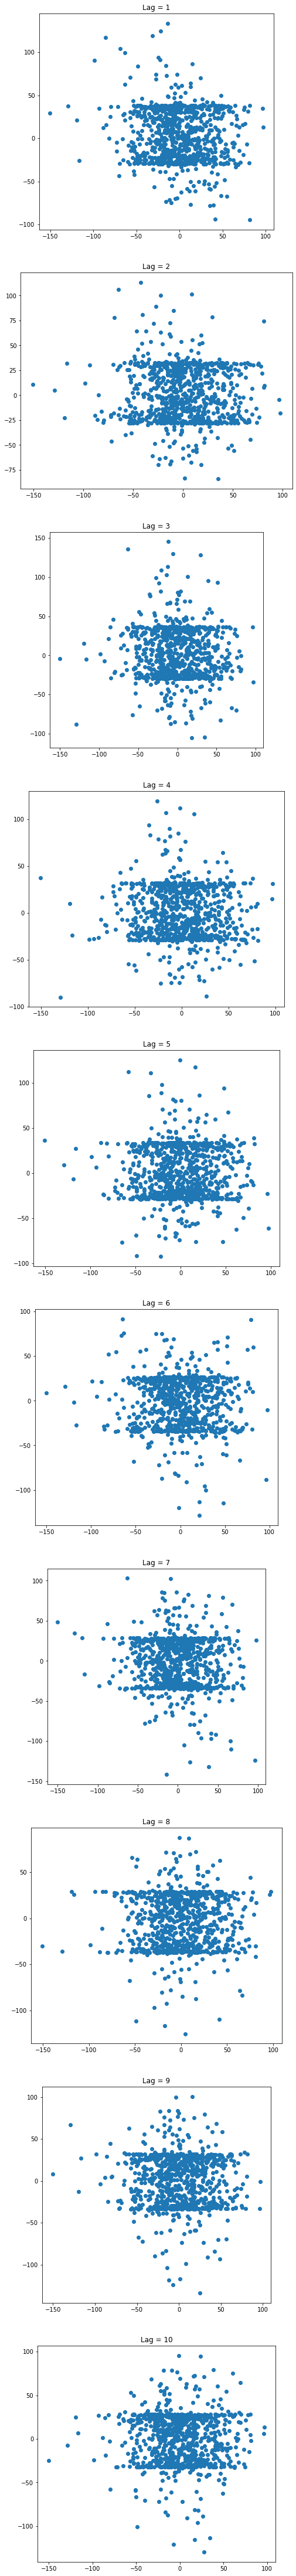

In [40]:
fig, axs = plt.subplots(10)
for i in range(10):
    axs[i].scatter(true_values[i],pred_values[i])
    axs[i].xlabel = 'True Values'
    axs[i].ylabel = 'Predicted Values'
    axs[i].set_title("Lag = "+str(i+1))
    axs[i].set_aspect('equal', adjustable='box')

In [41]:
#Performing Grid Search for best kernel

In [42]:
parameters = {'kernel':('linear', 'poly', 'rbf', 'sigmoid'),'C':(1,2,5,10),'epsilon':(0.1,.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,1.5,2.0)}
svr = SVR()
reg = GridSearchCV(svr, parameters)

In [43]:
lag = 1

# forming features using lag
y = df['ISMR'][lag:]
X = df.iloc[:-1*lag,:]

# performing grid search
reg.fit(X,y)

#generating predictions
preds = reg.predict(X)

# calculating error to help as compare lag performance
rmse = np.sqrt(mean_squared_error(y, preds))

In [44]:
rmse

31.519244924329566

In [45]:
print(reg.best_params_)

{'C': 2, 'epsilon': 2.0, 'kernel': 'linear'}


In [46]:
# We use lag 1 from previous analysis. The best kernel comes out to be linear.